In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/cosmetics.csv")
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [ ]:
X = df[['Price', 'Rank']]
y = df['Label']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
accuracy = accuracy_score(y_test , y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[34  4  8  8  7  4]
 [ 4 15  4 11  9  6]
 [ 9  7 20  9  4  6]
 [ 6  9  3 15 11 11]
 [ 5  4  3  8  3  1]
 [ 3  3  7 17  6 11]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Cleanser       0.56      0.52      0.54        65
   Eye cream       0.36      0.31      0.33        49
   Face Mask       0.44      0.36      0.40        55
 Moisturizer       0.22      0.27      0.24        55
 Sun protect       0.07      0.12      0.09        24
   Treatment       0.28      0.23      0.26        47

    accuracy                           0.33       295
   macro avg       0.32      0.30      0.31       295
weighted avg       0.36      0.33      0.34       295



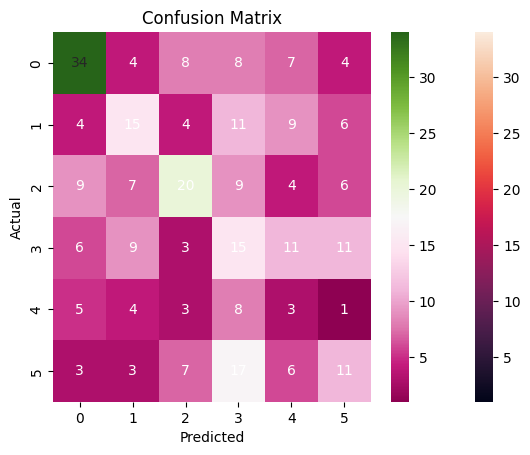

In [ ]:
sns.heatmap(conf_matrix, annot=True)
sns.heatmap(conf_matrix, cmap="PiYG")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()